In [2]:
import matplotlib.pyplot as plt
import numpy as np
import suite2p

In [117]:
raw = "C:\\Users\\zfj\\data\\091422B - bleed testing\\chirp_bleed3_120_00001.tif"
tif = suite2p.io.tiff.ScanImageTiffReader(raw)

raw_dat = tif.data().reshape((-1,4,32,128))

In [118]:
stim = np.diff(raw_dat[:,3,:,:].flatten())
stim_t= np.where(np.abs(stim) > 1024)[0] + 1

In [119]:
stim_t = stim_t[np.diff(stim_t, prepend=0)>128] #debounce

stim_on = stim_t[0::2]
stim_off = stim_t[1::2]

i = np.where(stim_off - stim_on < 32.79 * 32 * 128 * 28 - (32 * 128))

stim_off = np.delete(stim_off, i)
stim_on = np.delete(stim_on, i)


# print(32.79 * 32 * 128 * 28) #expected stim time


(5,) (5,)


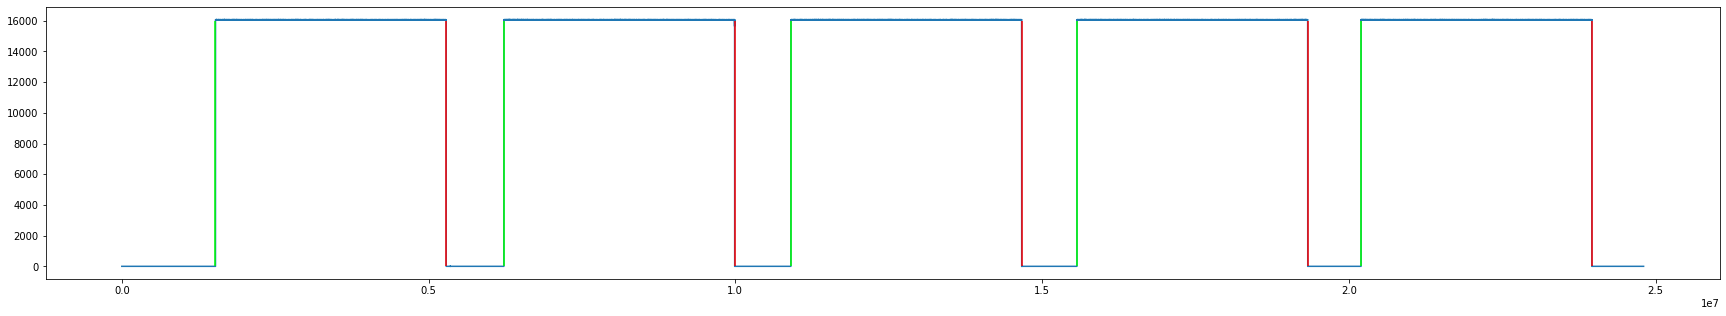

In [120]:
plt.figure(figsize=(30,5))
plt.plot(raw_dat[:,3,:,:].flatten())
plt.vlines(stim_on, 0, 16000, color=[0,1,0])
plt.vlines(stim_off, 0, 16000, color=[1,0,0])
print(stim_on.shape, stim_off.shape)


In [121]:
g = raw_dat[:,1,:,:].flatten()
t = (int(32.79 * 32 * 128 * 2),int(32.79 * 32 * 128 * 30))
g_e = np.empty((int(t[0] + t[1]),len(stim_on)))
for i,s in enumerate(stim_on):
    g_e[:,i] = g[(stim_on[i] - t[0]):(stim_on[i] + t[1])]

Text(0.5, 1.0, 'Stimulus artifact')

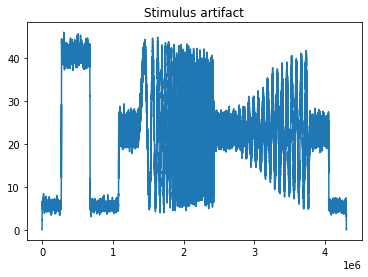

In [144]:
sm = np.convolve(g_e.mean(axis=1), np.ones(2000)) / 2000
plt.plot(sm)
plt.title('Stimulus artifact')


In [123]:
r = raw_dat[:,0,:,:].flatten()
t = (int(32.79 * 32 * 128 * 2),int(32.79 * 32 * 128 * 30))
r_e = np.empty((int(t[0] + t[1]),len(stim_on)))
for i,s in enumerate(stim_on):
    r_e[:,i] = r[(stim_on[i] - t[0]):(stim_on[i] + t[1])]

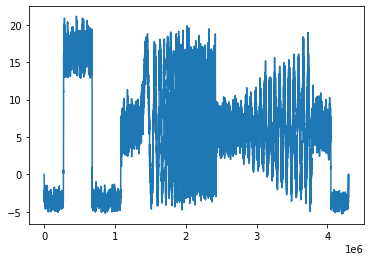

In [125]:
sm = np.convolve(r_e.mean(axis=1), np.ones(2000)) / 2000
plt.plot(sm)

In [126]:
print(sm.mean(), sm.std())
#cond1: G: 8.5 +/- 2.25;    R: 1.18 +/- 1.39
#cond2: G: 17.12 +/- 1.35;  R: 11.16 +/- 1.5
#cond3: G: 16 +/- 8;        R: 2.98 +/- 4.6
#cond4: G: 21.1 +/- 11.9;   R: 5.23 +/- 6.76

5.2318728866990405 6.757809111297736


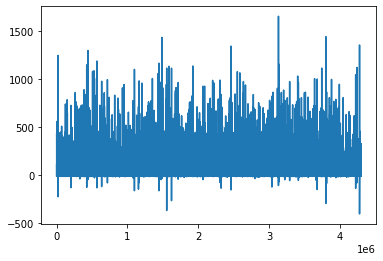

In [160]:
pre_samp = int(32.79 * 32 * 128 * 2)
# gr = (g_e - g_e[:pre_samp,:].mean())  / (r_e - r_e[:pre_samp,:].mean())
# gr[np.abs(gr)>10] = np.nan
# plt.hist(gr.flatten(), bins=np.linspace(-10,10,100))

# plt.hist((g_e - g_e[:pre_samp,:].mean()).flatten(), bins=np.arange(-20,1500))
# plt.plot((g_e - g_e[:pre_samp,:].mean()).mean(axis=1))